In [4]:
import networkx as nx
import csv
import os
import matplotlib.pyplot as plt

def idplot(base,hops,_type,method):
    G = nx.Graph()
    g = {}
    for file in os.listdir(base):
        filename = os.fsdecode(file)
        if _type in filename and method in filename:
            with open(base + filename, "r") as csvfile:
                d = list(csv.reader(csvfile))
                for r in range(len(d)-(30-hops)):
                    ip1 = d[r][2]
                    ip2 = d[r + 1][2]
                    effe = ["*", "ip"]
                    if ip1 not in effe and ip2 not in effe:
                        if ip1 not in g:
                            g[ip1] = []
                        if ip2 not in g[ip1]:
                            g[ip1].append(ip2)

    for k, v in g.items():
        G.add_node(k)
        for i in v:
            G.add_edge(k, i)

    return G

def draw(G):
    _,degree = map(list, zip(*G.degree())) 
    nx.draw_kamada_kawai(
            G,
            node_color=range(len(G.degree())),
            cmap=plt.cm.GnBu,
            node_size=[(v * 500) + 1 for v in  degree],
            with_labels=True,
        )

In [41]:
def cloud_draw(provider,hops):
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)   # Define 3 rows, 2 column, Activate subplot 1. 
    base = f"/home/rc/idp-castellotti-data//{provider}/"
    plt.subplot(321).set_title(f"{provider} STARLINK 7 HOPS ICMP")
    G=idplot(base=base,hops=8,_type="starlink",method="ICMP")
    draw(G)

    plt.subplot(322).set_title(f"{provider} NORMAL 7 HOPS ICMP ")
    G=idplot(base=base,hops=hops,_type="normal",method="ICMP")
    draw(G)

    plt.subplot(323).set_title(f"{provider} STARLINK 7 HOPS UDP")
    G=idplot(base=base,hops=hops,_type="starlink",method="UDP")
    draw(G)

    plt.subplot(324).set_title(f"{provider} NORMAL 7 HOPS UDP")
    G=idplot(base=base,hops=hops,_type="normal",method="UDP")
    draw(G)

    plt.subplot(325).set_title(f"{provider} STARLINK 7 HOPS TCP")
    G=idplot(base=base,hops=hops,_type="starlink",method="TCP")
    draw(G)

    plt.subplot(326).set_title(f"{provider} NORMAL 7 HOPS TCP")
    G=idplot(base=base,hops=hops,_type="normal",method="TCP")
    draw(G)

    plt.show()

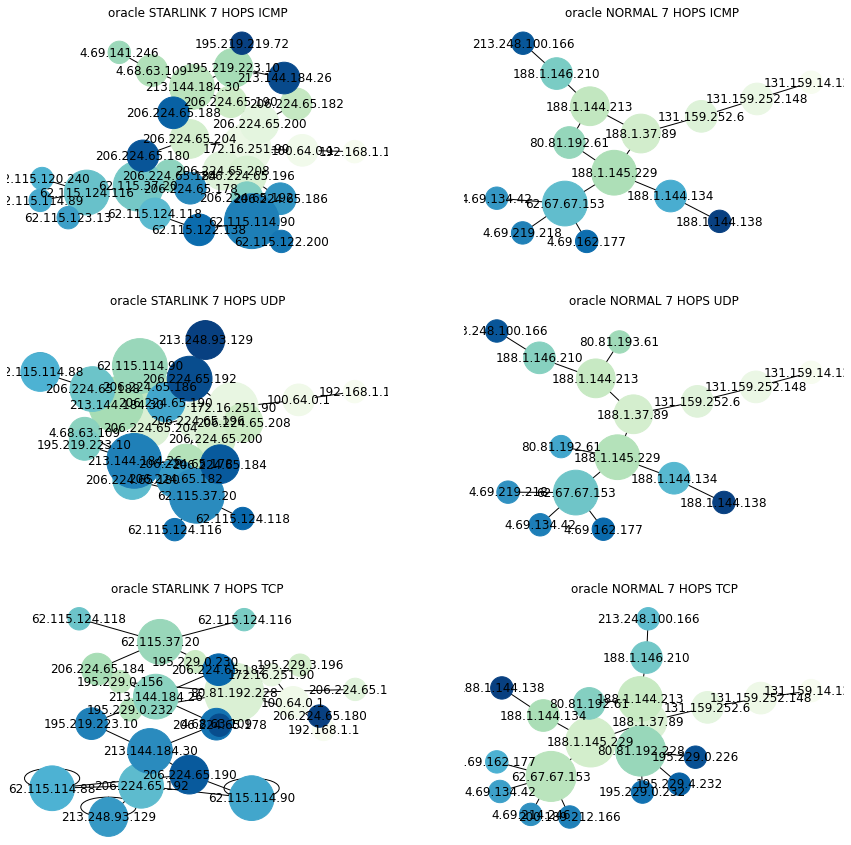

In [42]:
cloud_draw(provider="oracle",hops=7)

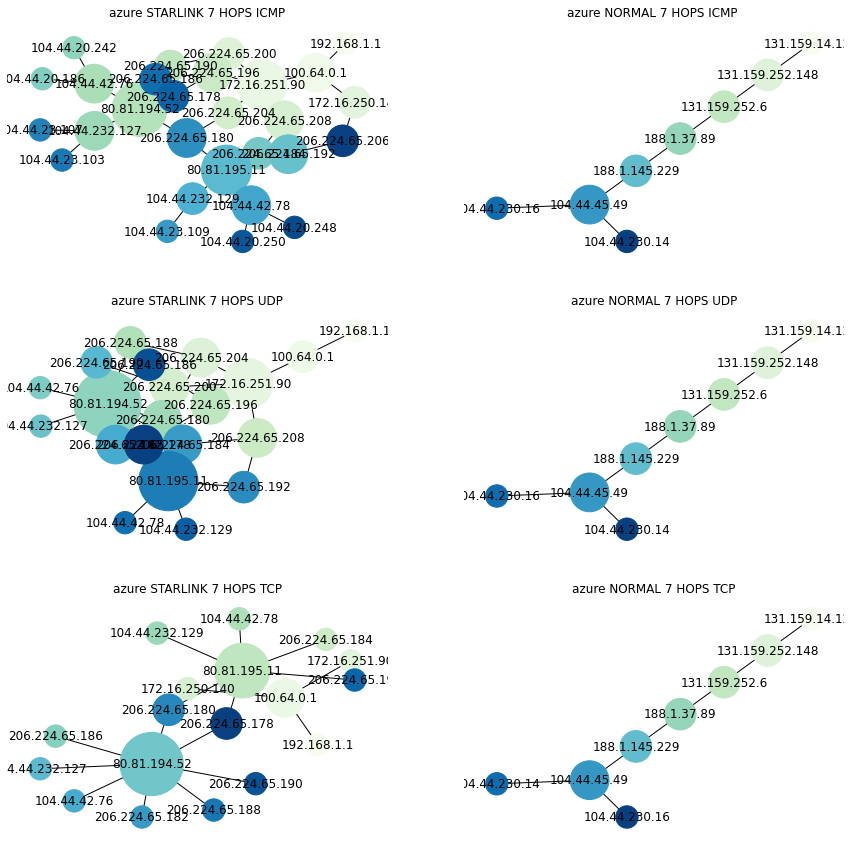

In [44]:
cloud_draw(provider="azure",hops=7)

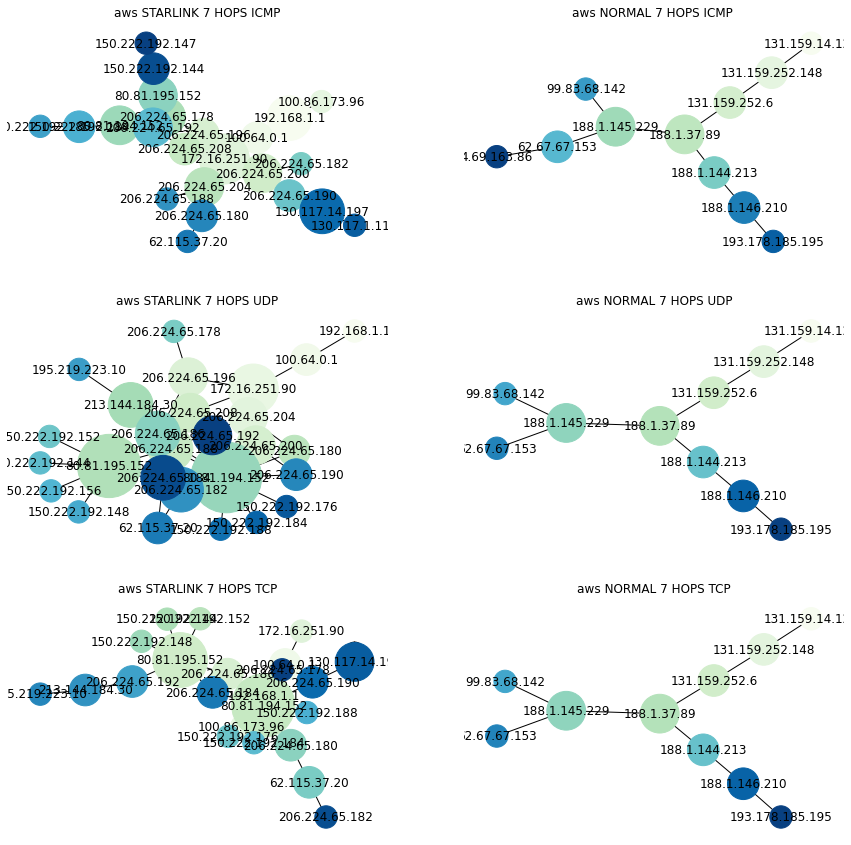

In [45]:
cloud_draw(provider="aws",hops=7)

In [57]:
def hostplot(base,hops,_type,method,host):
    G = nx.Graph()
    g = {}
    for file in os.listdir(base):
        filename = os.fsdecode(file)
        if _type in filename and method in filename and host in filename:
            with open(base + filename, "r") as csvfile:
                d = list(csv.reader(csvfile))
                for r in range(len(d)-(30-hops)):
                    ip1 = d[r][2]
                    ip2 = d[r + 1][2]
                    effe = ["*", "ip"]
                    if ip1 not in effe and ip2 not in effe:
                        if ip1 not in g:
                            g[ip1] = []
                        if ip2 not in g[ip1]:
                            g[ip1].append(ip2)

    for k, v in g.items():
        G.add_node(k)
        for i in v:
            G.add_edge(k, i)

    return G

In [65]:
# traceroutes to a single host (all 3 different protocols) (starlink vs normal)
def host_draw(provider,hops,host):
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)
    
    base = f"/home/rc/idp-castellotti-data/new-traceroutes/{provider}/"
    plt.subplot(321).set_title(f"{host} STARLINK 7 HOPS ICMP")
    G=hostplot(base=base,hops=8,_type="starlink",host=host,method="ICMP")
    draw(G)

    plt.subplot(322).set_title(f"{host} NORMAL 7 HOPS ICMP ")
    G=hostplot(base=base,hops=hops,_type="normal",host=host,method="ICMP")
    draw(G)

    plt.subplot(323).set_title(f"{host} STARLINK 7 HOPS UDP")
    G=hostplot(base=base,hops=hops,_type="starlink",host=host,method="UDP")
    draw(G)

    plt.subplot(324).set_title(f"{host} NORMAL 7 HOPS UDP")
    G=hostplot(base=base,hops=hops,_type="normal",host=host,method="UDP")
    draw(G)

    plt.subplot(325).set_title(f"{host} STARLINK 7 HOPS TCP")
    G=hostplot(base=base,hops=hops,_type="starlink",host=host,method="TCP")
    draw(G)

    plt.subplot(326).set_title(f"{host} NORMAL 7 HOPS TCP")
    G=hostplot(base=base,hops=hops,_type="normal",host=host,method="TCP")
    draw(G)
    plt.show()

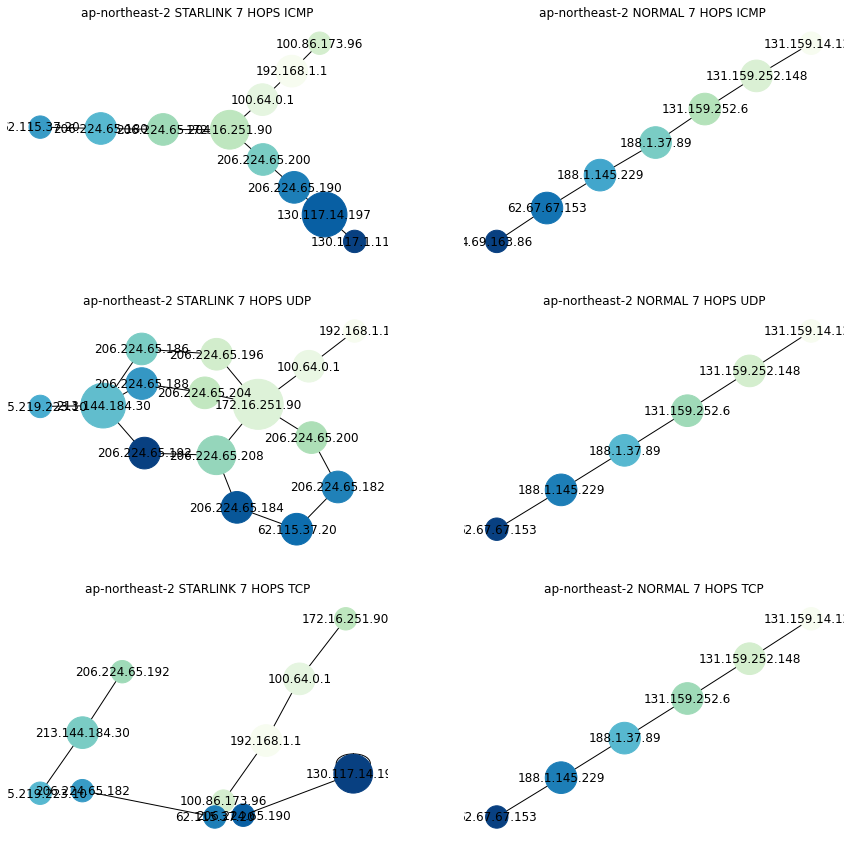

In [74]:
# azure,seoul,4.181.0.0
# azure,washington,4.156.0.0
# azure,dublin,4.207.0.0
# azure,mumbai,4.187.64.0
# azure,sao-paulo,65.54.67.0
# azure,melbourne,52.121.106.0
# aws,ap-northeast-2,3.5.140.0
# aws,us-east-1,13.34.66.0
# aws,eu-west-1,99.87.32.0
# aws,ap-south-1,3.108.0.0
# aws,sa-east-1,3.2.35.64
# aws,me-south-1,15.185.0.0
# oracle,us-phoenix-1,129.146.128.0
# oracle,sa-saopaulo-1,129.148.16.0
# oracle,uk-cardiff-1,129.151.64.0
# oracle,ap-seoul-1,64.110.64.0
# oracle,me-dubai-1,139.185.32.0
# oracle,eu-amsterdam-1,140.204.84.0

host_draw(provider="aws", host="ap-northeast-2",hops=7)

In [20]:
# traceroutes to the same geoographic area (oracle,ap-seoul-1,64.110.64.0 and azure,seoul,4.181.0.0 are in the same location)

In [21]:
# create GIF to draw how the same traceroute changes?

In [6]:
def cloud_draw(provider,hops):
    plt.figure(figsize=(15, 15))
    plt.subplot(3, 2, 1)   # Define 3 rows, 2 column, Activate subplot 1. 
    base = f"/home/rc/idp-castellotti-data/traceroutes-iperf-5bks/{provider}/"
    plt.subplot(321).set_title(f"{provider} STARLINK 7 HOPS ICMP")
    G=idplot(base=base,hops=8,_type="starlink",method="ICMP")
    draw(G)

    plt.subplot(322).set_title(f"{provider} NORMAL 7 HOPS ICMP ")
    G=idplot(base=base,hops=hops,_type="normal",method="ICMP")
    draw(G)
    plt.show()

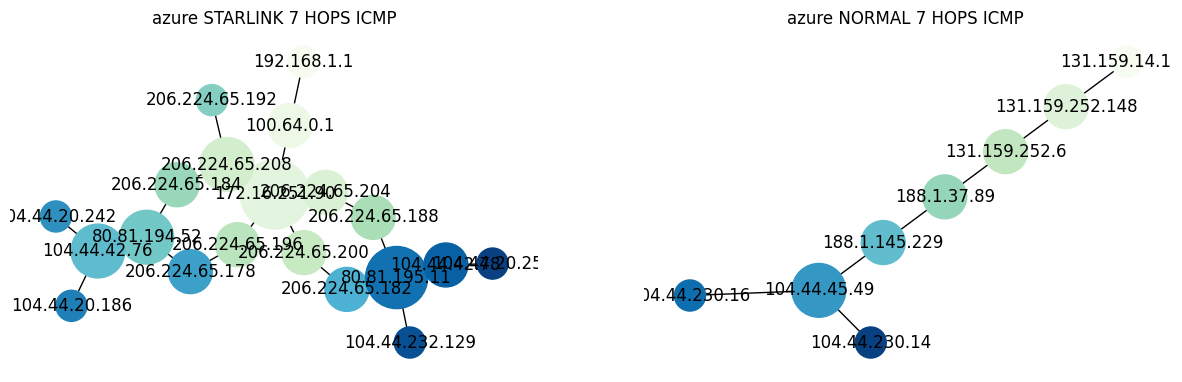

In [7]:
cloud_draw(provider="azure",hops=7)

TypeError: boxplot() got an unexpected keyword argument 'orientation'

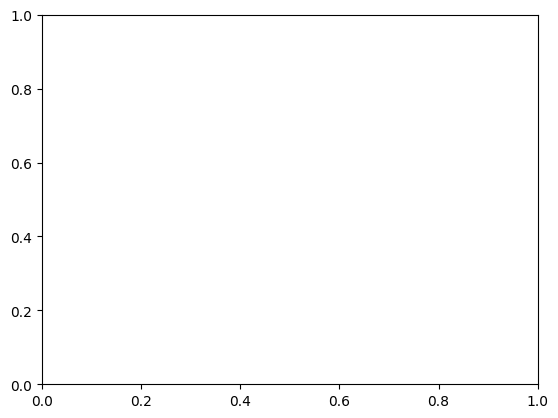

In [14]:
import seaborn as sns
import pandas as pd

df = pd.read_csv('/home/rc/idp-castellotti/iperf.csv')
sns.boxplot(data=df[["10k", "20k","50k","100k","1M","10M"]],orientation="h")